<a href="https://colab.research.google.com/github/JavedRamjaun/ProgrammingAssignment/blob/main/EnronEmail(Assignment2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-26 14:49:27--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 52.105.206.39, 2a01:111:f402:f043::39
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|52.105.206.39|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-26 14:49:28--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  14.6MB/s    in 49s     

2023-05-26 14:50:17 (16.7 MB/s) - 

In [2]:
# Importing necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#Connect to the Enron SQLite database
conn = sqlite3.connect("enron.db")

In [3]:
cur = conn.cursor()

In [4]:
#Query the database to find out the names of all the tables it contains
sql = """
SELECT name
FROM sqlite_master
WHERE type = 'table'
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [ ]:
#Schema of the table 'message'
sql = """
PRAGMA table_info('message');

"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [ ]:
#Schema of the table 'employeelist'
sql = """
PRAGMA table_info('employeelist');

"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [ ]:
#Schema of the table 'recipientinfo'
sql = """
PRAGMA table_info('recipientinfo');

"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [ ]:
#Schema of the table 'referenceinfo'
sql = """
PRAGMA table_info('referenceinfo');

"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [ ]:
c = conn.cursor()
# Execute the SQL query
c.execute('SELECT date FROM Message LIMIT 1')

# Fetch the result
result = c.fetchone()

# Close the connection
conn.close()

In [ ]:
#EMAIL TRAFFIC OVER TIME

sql = """
SELECT *
FROM message;
"""

cur.execute(sql)
cur.fetchall()

In [5]:
sql = """
SELECT * from message;
"""

#Load the data into a dataframe
users_df = pd.read_sql_query(sql, conn)
users_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
#Verifying if the database includes any null values
null_values = users_df.isnull().sum()

print(null_values)

mid           0
sender        0
date          0
message_id    0
subject       0
body          0
folder        0
dtype: int64


In [ ]:
#Counting Emails per day
sql = """
SELECT strftime('%Y-%m-%d', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date
"""

#put into a data Frame
day_df = pd.read_sql_query(sql, conn)
day_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


In [ ]:
#Counting emails per month
sql_month = """
SELECT strftime('%Y-%m', date) 
AS month,
 COUNT(*) AS count FROM message
GROUP BY date
"""

#put into a data Frame
month_df = pd.read_sql_query(sql_month, conn)
month_df

,month,count
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,1
4,0001-08,1
...,...,...
194082,2020-12,1
194083,2043-12,1
194084,2044-01,1
194085,2044-01,1


In [ ]:
#Counting emails per week
sql_week = """
SELECT strftime('%Y-%W', date) AS week,
 COUNT(*) AS count FROM message
GROUP BY date
"""
#put into a dataframe
week_df = pd.read_sql_query(sql_week, conn)
week_df

,week,count
0,0001-22,2
1,0001-25,1
2,0001-30,1
3,0001-31,1
4,0001-32,1
...,...,...
194082,2020-52,1
194083,2043-52,1
194084,2044-00,1
194085,2044-01,1


In [ ]:
# Counting Emails per year
sql_year = """
SELECT strftime('%Y', date) AS year,
 COUNT(*) AS count FROM message
GROUP BY date
"""
#put into a dataframe
year_df = pd.read_sql_query(sql_year, conn)
year_df



,year,count
0,0001,2
1,0001,1
2,0001,1
3,0001,1
4,0001,1
...,...,...
194082,2020,1
194083,2043,1
194084,2044,1
194085,2044,1


<Axes: xlabel='date', ylabel='count'>

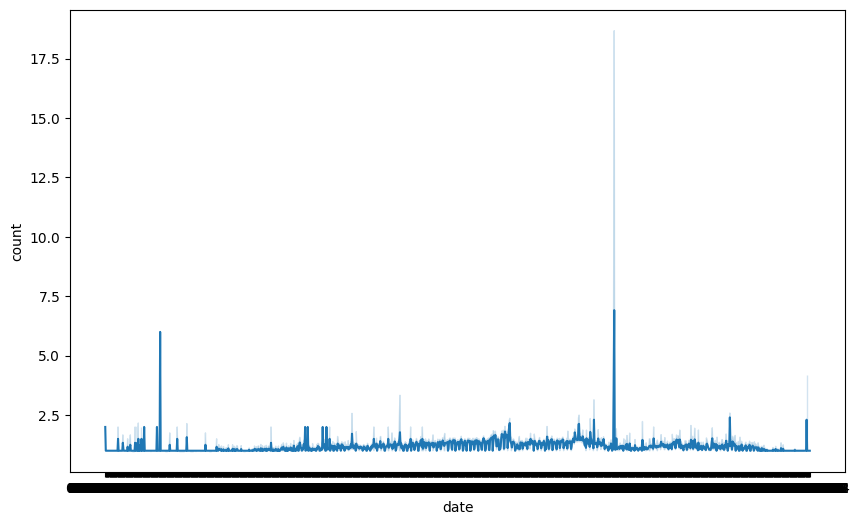

In [ ]:
# Plotting emails sent per day
import seaborn as sns
fig = plt.subplots(figsize=(10,6))
sns.lineplot(x = 'date', y= 'count', data= day_df)


This block of code above's purpose is to  create a line plot showing the number of emails sent per day. It is used to analyse the overall trend in email communication. For example, there are some days where more emails might be sent than others.

<Axes: xlabel='month', ylabel='count'>

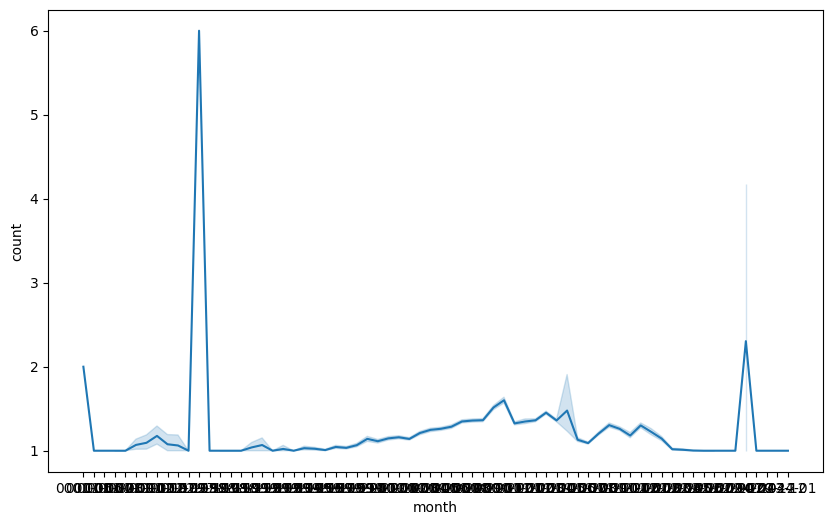

In [ ]:
# Plotting emails sent per month
import seaborn as sns
fig = plt.subplots(figsize=(10,6))
sns.lineplot(x = 'month', y = 'count', data= month_df)




This is the same as the previous diagram except instead of emails sent per day it is emails sent per month.

<Axes: xlabel='year', ylabel='count'>

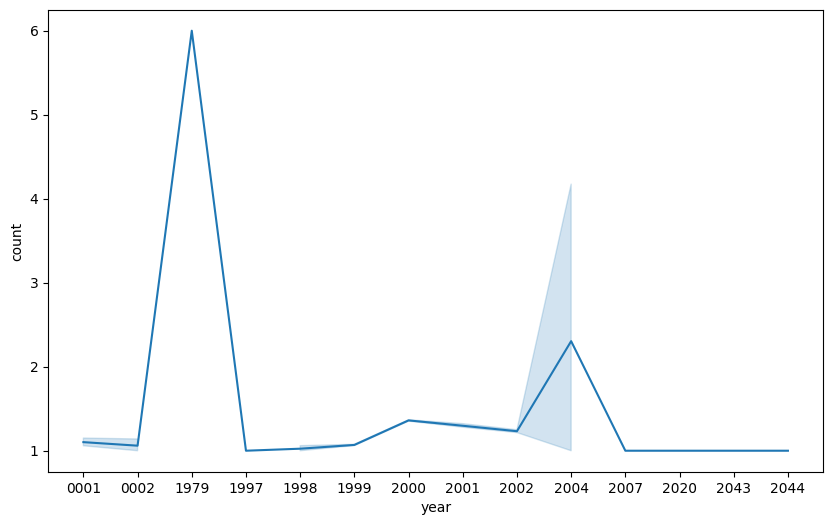

In [ ]:
# Plotting emails sent per year
import seaborn as sns
fig = plt.subplots(figsize=(10,6))
sns.lineplot(x = 'year', y = 'count', data= year_df)


The above diagram shows a chart of the number of emails sent per year.


<Axes: xlabel='week', ylabel='count'>

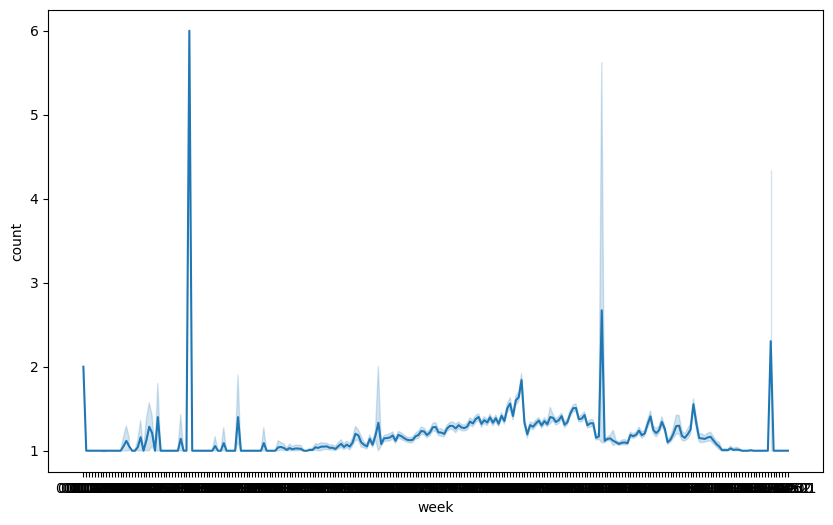

In [ ]:
# Plotting emails sent per week
import seaborn as sns
fig = plt.subplots(figsize=(10,6))
sns.lineplot(x = 'week', y = 'count', data= week_df)


This above diagram shows how many emails were sent each week.

In [ ]:
#TOP SENDERS AND RECIPIENT

# Extract sender information from the Message table
query_senders = """
SELECT sender, COUNT(*) as count
FROM message
GROUP BY sender
ORDER BY count DESC
"""
df_senders = pd.read_sql_query(query_senders , conn)

# Extract recipient information from the Recipientinfo table
query_recipients = """
SELECT rvalue AS recipient, COUNT(*) as count
FROM Recipientinfo
GROUP BY recipient
ORDER BY count DESC
"""
df_recipients = pd.read_sql_query(query_recipients, conn)


# Display top 10 senders
print("Top 10 Email Senders:")
print(df_senders.head(10))

# Display top 10 recipients
print("Top 10 Email Recipients:")
print(df_recipients.head(10))

Top 10 Email Senders:
                          sender  count
0        jeff.dasovich@enron.com   6273
1           j.kaminski@enron.com   5838
2             kay.mann@enron.com   5100
3      sara.shackleton@enron.com   4797
4           tana.jones@enron.com   4437
5        chris.germany@enron.com   3686
6           no.address@enron.com   3511
7  enron.announcements@enron.com   2838
8      matthew.lenhart@enron.com   2784
9    debra.perlingiere@enron.com   2549
Top 10 Email Recipients:
                   recipient  count
0       no.address@enron.com  19198
1    jeff.dasovich@enron.com  11137
2  richard.shapiro@enron.com  11015
3    steven.j.kean@enron.com  10873
4  james.d.steffes@enron.com  10615
5       tana.jones@enron.com   9781
6  sara.shackleton@enron.com   9633
7    mark.e.taylor@enron.com   9090
8   louise.kitchen@enron.com   7603
9       pete.davis@enron.com   7509


<Figure size 1000x600 with 0 Axes>

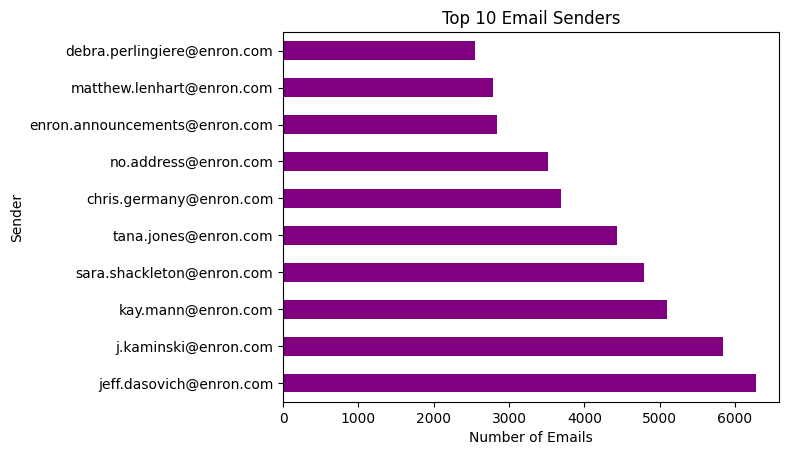

<Figure size 1000x600 with 0 Axes>

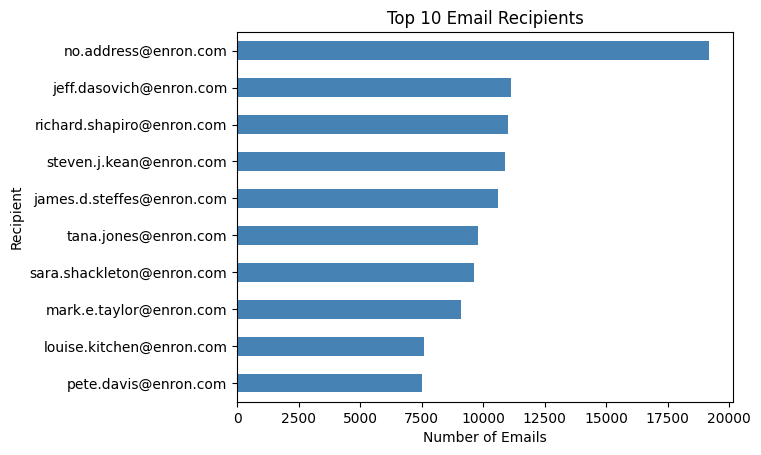

In [ ]:
# Plot top 10 senders
top_senders = df_senders.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(10,6))
top_senders.plot(kind='barh', y='count', x='sender', legend=False, color='purple')
plt.title('Top 10 Email Senders')
plt.xlabel('Number of Emails')
plt.ylabel('Sender')
plt.show()

# Plot top 10 recipients
plt.figure(figsize=(10,6))
df_recipients.head(10).sort_values('count').plot(kind='barh', y='count', x='recipient', legend=False, color='steelblue')
plt.title('Top 10 Email Recipients')
plt.xlabel('Number of Emails')
plt.ylabel('Recipient')
plt.show()

Above are 2 horizontal bar charts one representing the 10 Senders who sent the most Emails in ascending order and the 2nd bar chart represents the Top 10 Recipients who received the most emails in descending order.

In [ ]:
#Email Distribution by Recipient Type

sql = """
SELECT rtype, COUNT(*) as count 
FROM Recipientinfo 
GROUP BY rtype
"""
# Execution
rtype_df = pd.read_sql_query(sql, conn)

print(rtype_df)



  rtype    count
0   BCC   253713
1    CC   253735
2    TO  1556994


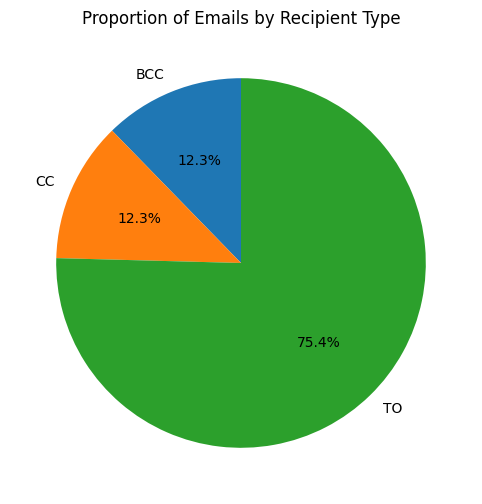

In [ ]:
# Calculate the proportions
rtype_proportions = rtype_df['count'] / rtype_df['count'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(rtype_proportions, labels=rtype_df['rtype'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Emails by Recipient Type')
plt.show()


The above pie chart represents the proportion of the distribution of emails by recipient types in percentage.

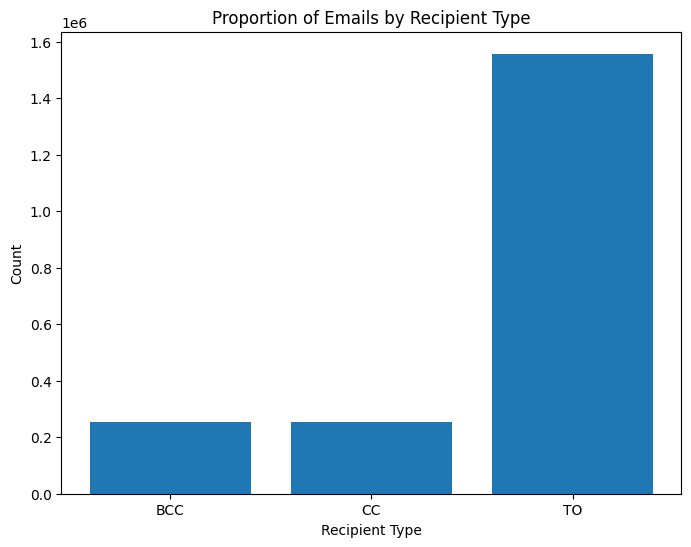

In [ ]:
# Create a stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(rtype_df['rtype'], rtype_df['count'])
plt.title('Proportion of Emails by Recipient Type')
plt.xlabel('Recipient Type')
plt.ylabel('Count')
plt.show()